importing Jupyter notebook from Pedidos.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   9215 non-null   float64       
 1   Fecha                    9215 non-null   datetime64[ns]
 2   Puerto de origen         9215 non-null   object        
 3   Transportista            9215 non-null   object        
 4   TPT                      9215 non-null   int64         
 5   Nivel de servicio        9215 non-null   object        
 6   Envío adelantado [días]  9215 non-null   int64         
 7   Envío tardío [días]      9215 non-null   int64         
 8   Cliente                  9215 non-null   object        
 9   Producto                 9215 non-null   int64         
 10  Planta                   9215 non-null   object        
 11  Puerto de destino        9215 non-null   object  

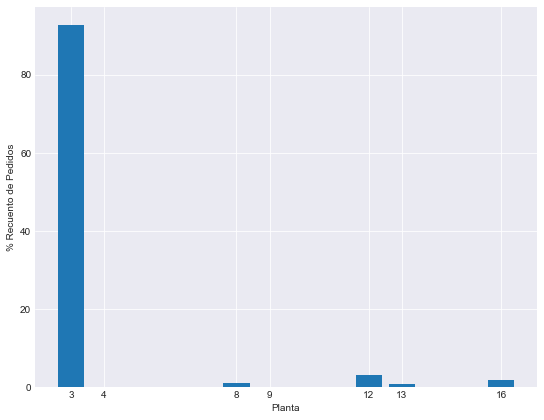

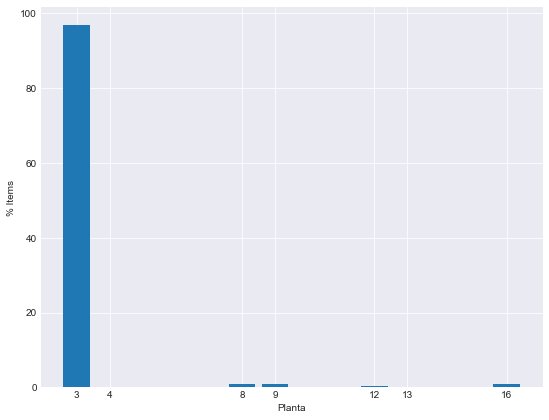

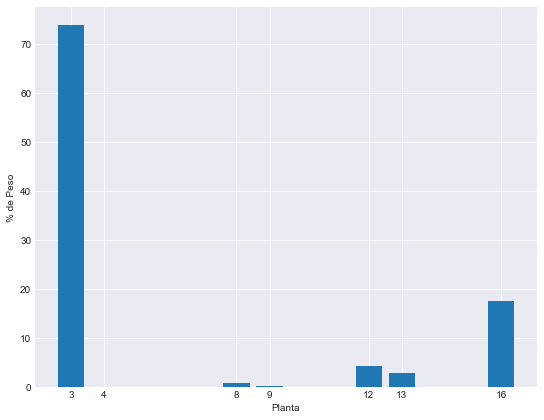

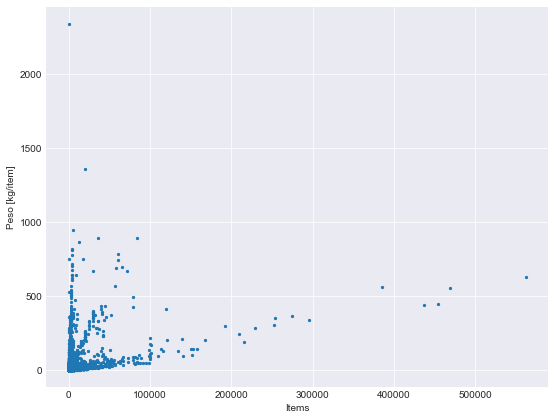

importing Jupyter notebook from Fletes.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transportista           1540 non-null   object 
 1   Puerto de origen        1540 non-null   object 
 2   Puerto de destino       1540 non-null   object 
 3   Peso mínimo [kg/item]   1540 non-null   float64
 4   Peso máximo [kg/item]   1540 non-null   float64
 5   Nivel de servicio       1540 non-null   object 
 6   Costo mínimo [USD/kg]   1540 non-null   float64
 7   Tasa de flete [USD/kg]  1540 non-null   float64
 8   Modo de transporte      1540 non-null   object 
 9   Envío [días]            1540 non-null   int64  
 10  Tipo de transportista   1540 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 132.5+ KB


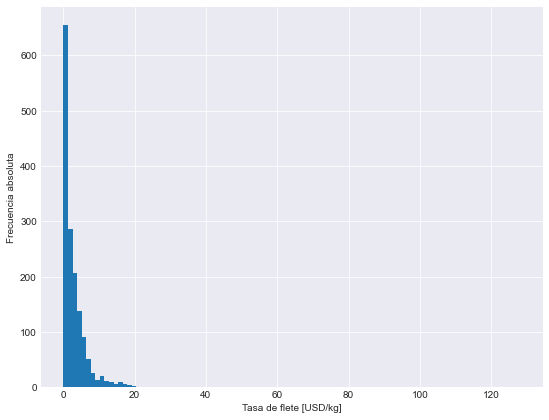

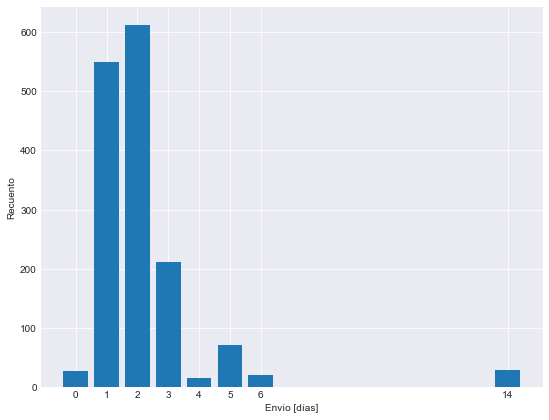

importing Jupyter notebook from Costos_de_almacenaje.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Planta                       19 non-null     object 
 1   Costo específico [USD/item]  19 non-null     float64
dtypes: float64(1), object(1)
memory usage: 432.0+ bytes


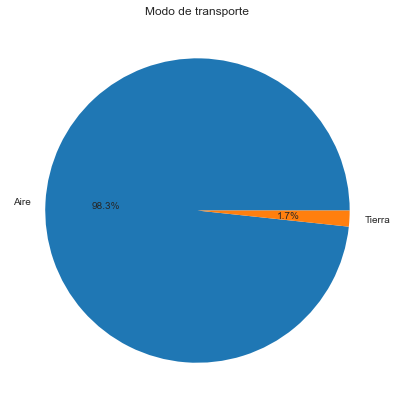

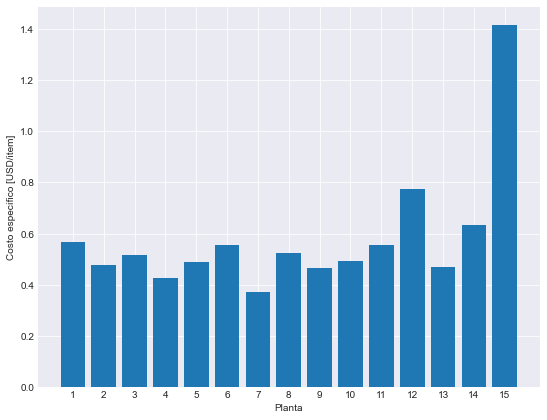

importing Jupyter notebook from Capacidad_de_almacenaje.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Planta                   19 non-null     object
 1   Capacidad [pedidos/día]  19 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


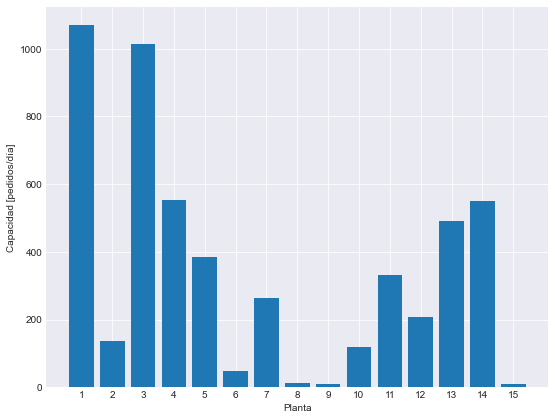

importing Jupyter notebook from Clientes_por_planta.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Planta   14 non-null     object
 1   Cliente  14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


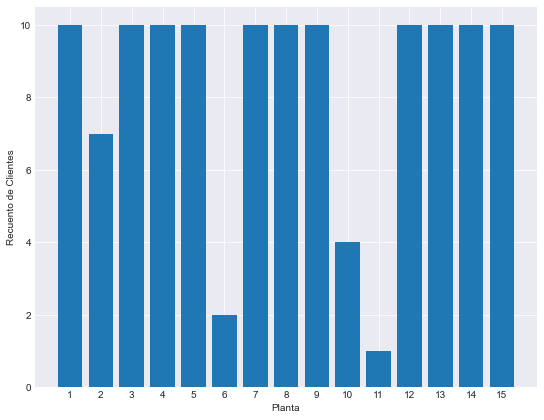

importing Jupyter notebook from Productos_por_planta.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Planta    2036 non-null   object
 1   Producto  2036 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.9+ KB


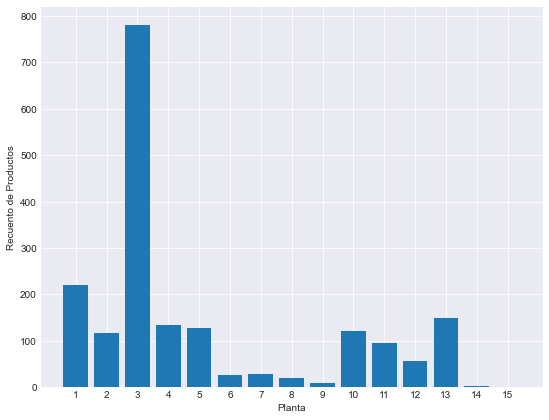

importing Jupyter notebook from Puertos_por_planta.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Planta            22 non-null     object
 1   Puerto de origen  22 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


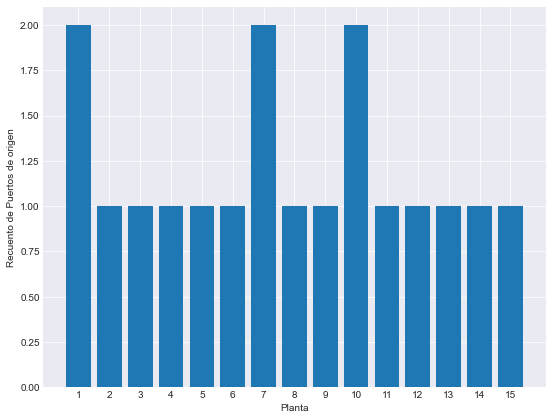

In [1]:
import numpy as np
import pandas as pd
import import_ipynb
import sys

#sys.path.append("C:\\Users\\Hernan\\Documents\\Datasets\\Supply Chain\\Restricciones")

from Pedidos import pedidos
from Fletes import fletes
from Costos_de_almacenaje import costos_almacenaje
from Capacidad_de_almacenaje import capacidad_almacenaje
from Clientes_por_planta import clientes_por_planta
from Productos_por_planta import productos_por_planta
from Puertos_por_planta import puertos_por_planta

# 2da Etapa: Optimización

*Función Objetivo*\
Se desea conocer un conjunto de plantas de almacenaje, puertos de origen y puertos de destino que minimicen el costo total de la cadena de suministro.

Nomenclatura:
- k: ID de pedido
- i: ID de planta de almacenamiento
- p: ID de puerto de origen
- j: ID de puerto de destino
- c: ID de transportista
- s: Nivel de servicio
- t: Tiempo de envío [días]
- m: Modo de transporte (aire o tierra)
- q: Cantidad de items en cada pedido [items]
- w: Peso [kg/item]
- F: Peso máximo [kg/item]

- C: Costo de almacenamiento [USD/item]
- M: Costo fijo de transporte [USD/kg]
- X: Costo de almacenamiento [USD]
- Y: Costo de transporte [USD/kg]
- Z: Costo total de la cadena de suministro [USD]

In [2]:
pedidos = pedidos[["Producto", "Items", "Peso [kg/item]"]].copy()

df1 = pd.merge(pedidos, productos_por_planta, on = "Producto")
df2 = pd.merge(df1, puertos_por_planta, on = "Planta")
df3 = pd.merge(df2, fletes, on = ["Puerto de origen"])
df4 = pd.merge(df3, costos_almacenaje, on = "Planta")
df5 = pd.merge(df4, capacidad_almacenaje, on = "Planta")
#df6 = pd.merge(df5, clientes_por_planta, on = "Planta")

df6 = df5

df6.round(2).head()

,Producto,Items,Peso [kg/item],Planta,Puerto de origen,Transportista,Puerto de destino,Peso mínimo [kg/item],Peso máximo [kg/item],Nivel de servicio,Costo mínimo [USD/kg],Tasa de flete [USD/kg],Modo de transporte,Envío [días],Tipo de transportista,Costo específico [USD/item],Capacidad [pedidos/día]
0,1699333,1529,3.01,3,4,V444_8,9,100.0,249.99,DTD,21.47,0.06,Aire,14,V88888888_0,0.52,1013
1,1699333,1529,3.01,3,4,V444_8,9,0.0,99.99,DTD,21.47,0.06,Aire,14,V88888888_0,0.52,1013
2,1699333,1529,3.01,3,4,V444_8,9,500.0,1999.99,DTD,21.47,0.06,Aire,14,V88888888_0,0.52,1013
3,1699333,1529,3.01,3,4,V444_8,9,250.0,499.99,DTD,21.47,0.06,Aire,14,V88888888_0,0.52,1013
4,1699333,1529,3.01,3,4,V444_8,9,2000.0,99999.99,DTD,21.47,0.06,Aire,14,V88888888_0,0.52,1013


*¿La tabla contiene filas duplicadas?*

In [3]:
df6.duplicated().any()

True

*Si la tabla tiene filas duplicadas, estas deben ser eliminadas.*

In [4]:
df6.drop_duplicates(inplace = True)

*¿Cuántas filas y columnas tiene la nueva tabla? (N° filas, N° columnas)*

In [5]:
df6.shape

(3308793, 17)

*Estadística Descriptiva del Costo de Almacenaje [USD]*

$$ X_{ki} = q_{ki}*C_i $$

In [6]:
df6["Costo de almacenaje [USD]"] = df6["Items"] * df6["Costo específico [USD/item]"]

g60 = df6.set_index("Planta").groupby(by = "Planta")["Costo de almacenaje [USD]"].transform("sum").reset_index()
g60.head()

,Planta,Costo de almacenaje [USD]
0,3,3.449154e+09
1,3,3.449154e+09
2,3,3.449154e+09
3,3,3.449154e+09
4,3,3.449154e+09


*Estadística Descriptiva del Costo de Transporte [USD]*

$$ \sum_{k}{w_{kpjcstm}} \leq max \ F_{kpjcstm} $$

In [7]:
df6["Peso [kg]"] = df6["Items"] * df6["Peso [kg/item]"]
df6["Peso máximo [kg]"] = df6["Items"] * df6["Peso máximo [kg/item]"]

g6 = df6.groupby(by = ["Puerto de origen", "Puerto de destino", "Transportista", 
                       "Modo de transporte", "Envío [días]"])["Peso [kg]", "Peso máximo [kg]"].transform("sum")

g6["Peso [kg]"] = np.where(g6["Peso [kg]"] <= g6["Peso máximo [kg]"], g6["Peso [kg]"], g6["Peso máximo [kg]"])

g6.head()

<ipython-input-7-19c6657f2341>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g6 = df6.groupby(by = ["Puerto de origen", "Puerto de destino", "Transportista",


,Peso [kg],Peso máximo [kg]
0,1.978384e+10,3.189110e+12
1,1.978384e+10,3.189110e+12
2,1.978384e+10,3.189110e+12
3,1.978384e+10,3.189110e+12
4,1.978384e+10,3.189110e+12


$$ Si \ s = CRF \ \Rightarrow \ Y_{kpjcstm} = 0 $$

$$ Si \ s \neq CRF, \ m = Tierra \ \Rightarrow \ Y_{kpjcstm} = \frac{w_{kpjcstm}}{\sum_{k}{w_{kpjcstm}}}*R_{kpjcstm} $$

$$ Si \ s \neq CRF, \ m \neq Tierra \ \Rightarrow \ Y_{kpjcstm} = w_{kpjcstm}*R_{kpjcstm} $$

$$ Si \ Y_{kpjcstm} < M_{kpjcstm} \ \Rightarrow \ Y_{kpjcstm} = M_{kpjcstm} $$

In [14]:
a = df6["Peso [kg]"] / g6["Peso [kg]"] * df6["Tasa de flete [USD/kg]"]
b = df6["Peso [kg]"] * df6["Tasa de flete [USD/kg]"]
c = df6["Costo mínimo [USD/kg]"]

df6["Costo de transporte [USD]"] = np.where(df6["Nivel de servicio"] == "CRF", 0, 
                                            np.where(df6["Modo de transporte"] == "Tierra", np.where(a < c, a, c), np.where(b < c, b, c)))

g61 = df6.set_index(["Puerto de origen", 
                    "Puerto de destino"]).groupby(by = ["Puerto de origen", 
                                                        "Puerto de destino"])["Costo de transporte [USD]"].transform("sum").reset_index()

g61.head()
#np.sort(g61["Puerto de origen"].unique())

array([2, 3, 4, 5, 6, 7], dtype=int64)

*Estadística Descriptiva del Costo Total [USD]*

$$ Z_{ipj} = min \sum_{k}{(X_{ki} + Y_{kpj})} $$

In [9]:
g62 = pd.concat([g60, g61], axis = 1)
g62["Costo total [USD]"] = g62["Costo de almacenaje [USD]"] + g62["Costo de transporte [USD]"]
g63 = g62.groupby(by = ["Planta", "Puerto de origen", "Puerto de destino"]).agg({"Costo total [USD]": "sum"})

total = g63["Costo total [USD]"].sum()
g63["%"] = g63["Costo total [USD]"].apply(lambda x: x / total * 100)

g63

,,,Costo total [USD],%
Planta,Puerto de origen,Puerto de destino,,
1,2,9,1.016107e+10,1.458094e-04
2,3,9,1.654761e+12,2.374550e-02
3,4,9,6.829895e+15,9.800766e+01
4,5,9,3.942666e+12,5.657649e-02
5,6,9,6.595680e+12,9.464672e-02
6,6,9,6.877934e+10,9.869700e-04
7,2,9,6.166604e+11,8.848957e-03
8,4,9,1.334021e+12,1.914294e-02
9,4,9,2.001523e+12,2.872146e-02
